In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

import torch
import torch.nn as nn

import random

import optuna

In [ ]:
torch.manual_seed(0)

device = torch.device("cuda:0" if torch.cuda.is_available()
                      else "cpu")


In [ ]:
df = pd.read_csv("../../preprocessed_data/[10분 단위]아파트_층별_소비전력_2023-03-16 06.30.00 ~ 2023-08-30 10.30.00.csv", usecols=[1,2,3,4])

df

,TIMESTAMP,BUILDING,FLOOR,CONSUMPTION(W)
0,2023-03-16 06:30:00,561,1,225
1,2023-03-16 06:40:00,561,1,217
2,2023-03-16 06:50:00,561,1,212
3,2023-03-16 07:00:00,561,1,88
4,2023-03-16 07:10:00,561,1,435
...,...,...,...,...
1588813,2023-08-30 09:50:00,563,24,366
1588814,2023-08-30 10:00:00,563,24,545
1588815,2023-08-30 10:10:00,563,24,567
1588816,2023-08-30 10:20:00,563,24,547


In [ ]:
df_561_1 = df.query("`BUILDING` == 561 and `FLOOR` == 1")

df_561_1

,TIMESTAMP,BUILDING,FLOOR,CONSUMPTION(W)
0,2023-03-16 06:30:00,561,1,225
1,2023-03-16 06:40:00,561,1,217
2,2023-03-16 06:50:00,561,1,212
3,2023-03-16 07:00:00,561,1,88
4,2023-03-16 07:10:00,561,1,435
...,...,...,...,...
24068,2023-08-30 09:50:00,561,1,354
24069,2023-08-30 10:00:00,561,1,354
24070,2023-08-30 10:10:00,561,1,387
24071,2023-08-30 10:20:00,561,1,505


In [ ]:
df_561_1.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)

df_561_1

C:\Users\hansung\AppData\Local\Temp\ipykernel_25716\2850472024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_1.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)


,TIMESTAMP,CONSUMPTION(W)
0,2023-03-16 06:30:00,225
1,2023-03-16 06:40:00,217
2,2023-03-16 06:50:00,212
3,2023-03-16 07:00:00,88
4,2023-03-16 07:10:00,435
...,...,...
24068,2023-08-30 09:50:00,354
24069,2023-08-30 10:00:00,354
24070,2023-08-30 10:10:00,387
24071,2023-08-30 10:20:00,505


In [ ]:
df_561_1.set_index('TIMESTAMP', inplace=True)
df_561_1


,CONSUMPTION(W)
TIMESTAMP,
2023-03-16 06:30:00,225
2023-03-16 06:40:00,217
2023-03-16 06:50:00,212
2023-03-16 07:00:00,88
2023-03-16 07:10:00,435
...,...
2023-08-30 09:50:00,354
2023-08-30 10:00:00,354
2023-08-30 10:10:00,387


<Axes: xlabel='TIMESTAMP'>

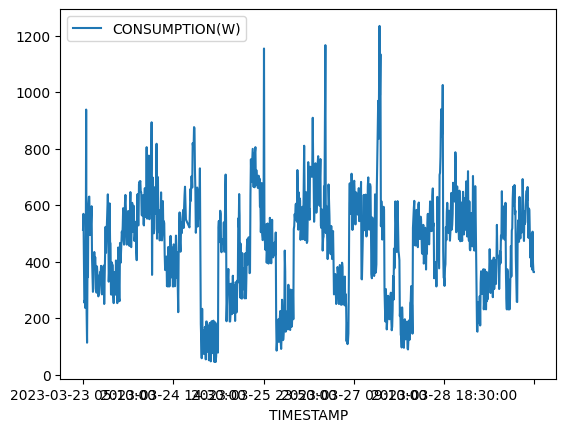

In [ ]:
df_561_1.iloc[1000:2000].plot()

In [ ]:
df_561_2 = df.query("`BUILDING` == 561 and `FLOOR` == 2")
df_561_2.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)
df_561_2.set_index('TIMESTAMP', inplace=True)
df_561_2


C:\Users\hansung\AppData\Local\Temp\ipykernel_25716\2286428902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_2.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)


,CONSUMPTION(W)
TIMESTAMP,
2023-03-16 06:30:00,256
2023-03-16 06:40:00,252
2023-03-16 06:50:00,237
2023-03-16 07:00:00,307
2023-03-16 07:10:00,304
...,...
2023-08-30 09:50:00,1244
2023-08-30 10:00:00,1309
2023-08-30 10:10:00,1233


<Axes: xlabel='TIMESTAMP'>

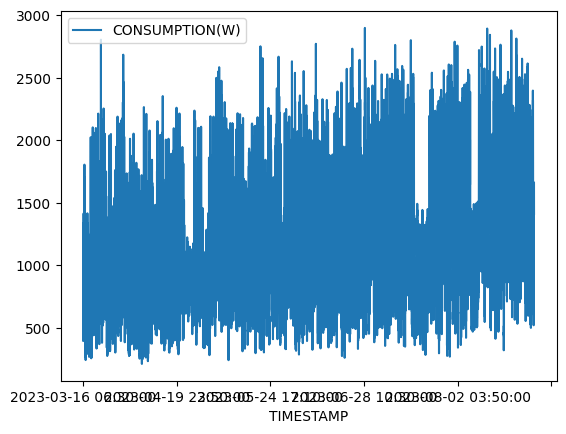

In [ ]:
df_12 = df_561_1 + df_561_2

df_12.plot()

In [ ]:
df_561_3 = df.query("`BUILDING` == 561 and `FLOOR` == 3")
df_561_3.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)
df_561_3.set_index('TIMESTAMP', inplace=True)
df_561_3


C:\Users\hansung\AppData\Local\Temp\ipykernel_25716\2174984375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_3.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)


,CONSUMPTION(W)
TIMESTAMP,
2023-03-16 06:30:00,264
2023-03-16 06:40:00,253
2023-03-16 06:50:00,135
2023-03-16 07:00:00,297
2023-03-16 07:10:00,271
...,...
2023-08-30 09:50:00,231
2023-08-30 10:00:00,229
2023-08-30 10:10:00,226


<Axes: xlabel='TIMESTAMP'>

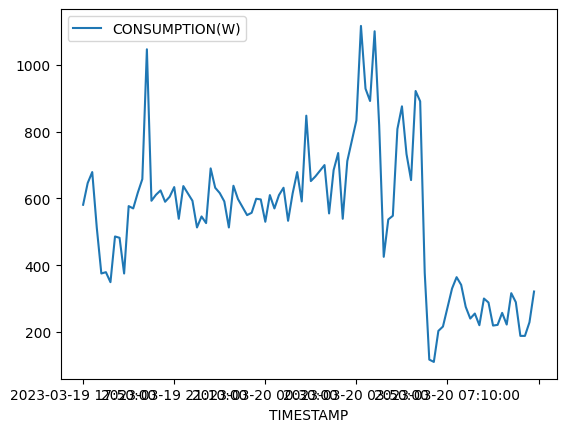

In [ ]:
df_561_1.iloc[500:600].plot()

<Axes: xlabel='TIMESTAMP'>

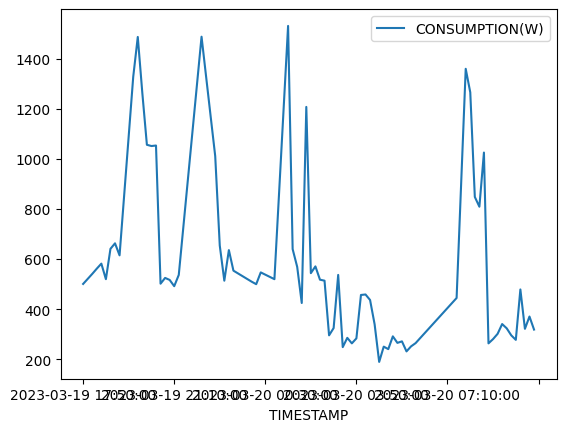

In [ ]:
df_561_2.iloc[500:600].plot()

<Axes: xlabel='TIMESTAMP'>

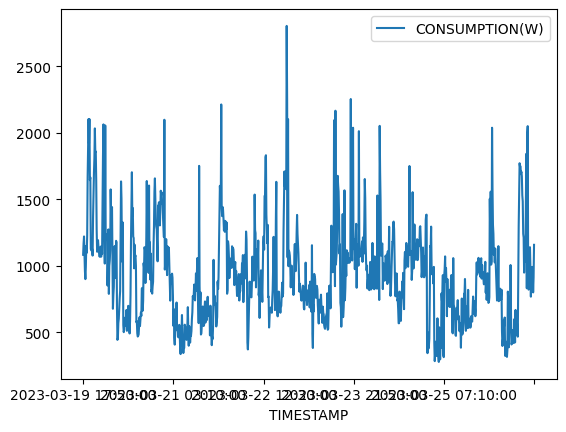

In [ ]:
df_12.iloc[500:1500].plot()

In [ ]:
df_123 = df_12 +df_561_3

df_123

,CONSUMPTION(W)
TIMESTAMP,
2023-03-16 06:30:00,745
2023-03-16 06:40:00,722
2023-03-16 06:50:00,584
2023-03-16 07:00:00,692
2023-03-16 07:10:00,1010
...,...
2023-08-30 09:50:00,1829
2023-08-30 10:00:00,1892
2023-08-30 10:10:00,1846


<Axes: xlabel='TIMESTAMP'>

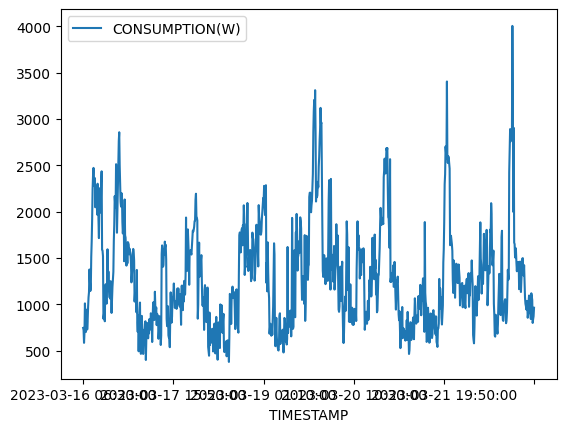

In [ ]:
df_123.iloc[:1000].plot()

In [ ]:
df_561_4 = df.query("`BUILDING` == 561 and `FLOOR` == 4")
df_561_4.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)
df_561_4.set_index('TIMESTAMP', inplace=True)
df_561_4


C:\Users\hansung\AppData\Local\Temp\ipykernel_25716\2736489274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_561_4.drop(['BUILDING', 'FLOOR'], axis=1, inplace=True)


,CONSUMPTION(W)
TIMESTAMP,
2023-03-16 06:30:00,70
2023-03-16 06:40:00,327
2023-03-16 06:50:00,188
2023-03-16 07:00:00,205
2023-03-16 07:10:00,135
...,...
2023-08-30 09:50:00,236
2023-08-30 10:00:00,285
2023-08-30 10:10:00,245


In [ ]:
df_1234 = df_561_4 + df_123
df_1234

,CONSUMPTION(W)
TIMESTAMP,
2023-03-16 06:30:00,815
2023-03-16 06:40:00,1049
2023-03-16 06:50:00,772
2023-03-16 07:00:00,897
2023-03-16 07:10:00,1145
...,...
2023-08-30 09:50:00,2065
2023-08-30 10:00:00,2177
2023-08-30 10:10:00,2091


<Axes: xlabel='TIMESTAMP'>

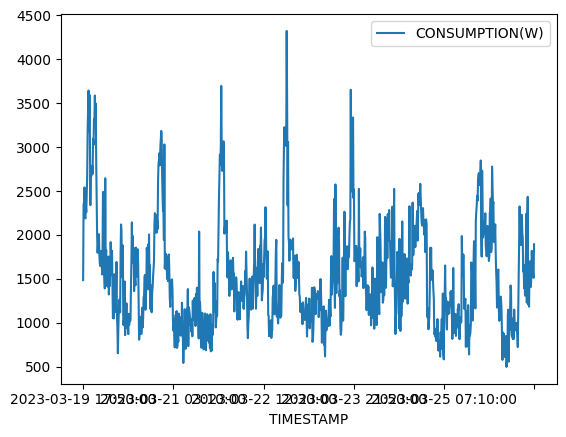

In [ ]:
df_1234.iloc[500:1500].plot()

In [ ]:
scaler_data = MinMaxScaler()

scaler_data.fit(df_561_1.values)

print(scaler_data.n_samples_seen_)   
print(scaler_data.data_min_)         
print(scaler_data.data_max_)  

24073
[39.]
[1257.]


[[0.15270936]
 [0.14614122]
 [0.14203612]
 ...
 [0.28571429]
 [0.38259442]
 [0.41707718]]


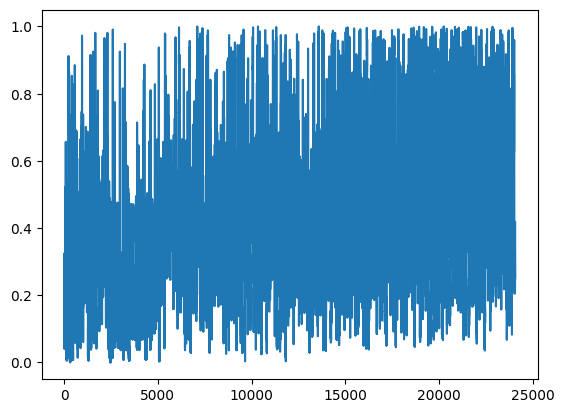

In [ ]:
scaled_data = scaler_data.transform(df_561_1.values)
print(scaled_data)
plt.plot(scaled_data)

In [ ]:
scaled_df = pd.DataFrame({'timestamp' : df_561_1.index, 'scaled_consumption' : scaled_data.flatten()})
scaled_df.set_index('timestamp', inplace=True)

scaled_df

,scaled_consumption
timestamp,
2023-03-16 06:30:00,0.152709
2023-03-16 06:40:00,0.146141
2023-03-16 06:50:00,0.142036
2023-03-16 07:00:00,0.040230
2023-03-16 07:10:00,0.325123
...,...
2023-08-30 09:50:00,0.258621
2023-08-30 10:00:00,0.258621
2023-08-30 10:10:00,0.285714


In [ ]:
scaled_df.loc[:'2023-06-01 00:00:00'].describe()

,scaled_consumption
count,11050.000000
mean,0.347014
std,0.188096
min,0.000000
25%,0.197044
50%,0.349343
75%,0.464696
max,1.000000


In [ ]:
scaled_df.loc['2023-06-01 00:00:00':].describe()

,scaled_consumption
count,13024.000000
mean,0.472460
std,0.215163
min,0.003284
25%,0.315271
50%,0.449097
75%,0.601806
max,1.000000


In [ ]:
int(len(scaled_df) * 0.1)

2407

In [ ]:
scaled_df[:int(len(scaled_df) * 0.9)]

In [ ]:
scaled_df = scaled_df.loc["2022-07-18 00:00:00" : '2022-08-31 23:59:00']

train_df = scaled_df[int(len(scaled_df) * 0.9) - int(len(scaled_df) * 0.01):int(len(scaled_df) * 0.9)]
train = train_df.to_numpy()

test_df = scaled_df[int(len(scaled_df) * 0.9):int(len(scaled_df) * 0.9)+100]
test = test_df.to_numpy()

In [ ]:
from torch.utils.data import DataLoader, Dataset

class windowDataset(Dataset):
    def __init__(self, y, input_window, output_window, stride=1):
        L = y.shape[0]
        num_samples = (L - input_window - output_window) // stride + 1

        X = np.zeros([input_window, num_samples])
        Y = np.zeros([output_window, num_samples])

        for i in np.arange(num_samples):
            start_x = stride*i
            end_x = start_x + input_window
            X[:,i] = y[start_x:end_x].reshape([-1,])

            start_y = stride*i + input_window
            end_y = start_y + output_window
            Y[:,i] = y[start_y:end_y].reshape([-1,])

        X = X.reshape(X.shape[0], X.shape[1], 1).transpose((1,0,2))
        Y = Y.reshape(Y.shape[0], Y.shape[1], 1).transpose((1,0,2))
        self.x = X
        self.y = Y
        
        self.len = len(X)
    def __getitem__(self, i):
        return self.x[i], self.y[i]
    def __len__(self):
        return self.len


In [ ]:
ow = 100
iw = ow * 2

train_dataset = windowDataset(train, input_window=iw, output_window=ow)
train_loader = DataLoader(train_dataset, batch_size=64)

In [ ]:
class lstm_encoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers = 1):
        super(lstm_encoder, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, batch_first=True)

    def forward(self, x_input):
        lstm_out, self.hidden = self.lstm(x_input)
        return lstm_out, self.hidden

In [ ]:
class lstm_decoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers = 1):
        super(lstm_decoder, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size,num_layers = num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, input_size)           

    def forward(self, x_input, encoder_hidden_states):
        lstm_out, self.hidden = self.lstm(x_input.unsqueeze(-1), encoder_hidden_states) 
        output = self.linear(lstm_out)
        
        return output, self.hidden

In [ ]:
class lstm_encoder_decoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(lstm_encoder_decoder, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size

        self.encoder = lstm_encoder(input_size = input_size, hidden_size = hidden_size)
        self.decoder = lstm_decoder(input_size = input_size, hidden_size = hidden_size)

    def forward(self, inputs, targets, target_len, teacher_forcing_ratio):
        batch_size = inputs.shape[0]
        input_size = inputs.shape[2]
        
        outputs = torch.zeros(batch_size, target_len, input_size)

        _, hidden = self.encoder(inputs)
        decoder_input = inputs[:,-1, :]
        
        for t in range(target_len): 
            out, hidden = self.decoder(decoder_input, hidden)
            out = out.squeeze(1)
            
            if random.random() < teacher_forcing_ratio:
                decoder_input = targets[:, t, :]
            else:
                decoder_input = out
            outputs[:,t,:] = out

        return outputs
	
    def predict(self, inputs, target_len):
        self.eval()
        inputs = inputs.unsqueeze(0)
        batch_size = inputs.shape[0]
        input_size = inputs.shape[2]
        outputs = torch.zeros(batch_size, target_len, input_size)
        _, hidden = self.encoder(inputs)
        decoder_input = inputs[:,-1, :]
        for t in range(target_len): 
            out, hidden = self.decoder(decoder_input, hidden)
            out = out.squeeze(1)
            decoder_input = out
            outputs[:,t,:] = out
        return outputs.detach().numpy()[0,:,0]

In [ ]:
def train(model, train_loader, optimizer, epoch, criterion):
    model.train()
    for i in range(epoch):
        total_loss = 0.0
        for x,y in train_loader:
            optimizer.zero_grad()
            x = x.float()
            y = y.float()
            output = model(x, y, ow, 0.6)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.cpu().item()

    

In [ ]:
import gc

def objective(trial: optuna.Trial, X, y, train_loader):
    param = {
        'lr' : trial.suggest_categorical('lr', [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]),
        'epoch' : trial.suggest_int('epoch', 1000, 7000, 1000),
        'hidden_size' : trial.suggest_categorical('hidden_size', [16, 32, 64, 128, 256])
    }

    model = lstm_encoder_decoder(input_size=1, hidden_size=param['hidden_size'])
    optimizer = torch.optim.Adam(model.parameters(), lr = param['lr'])
    criterion = nn.MSELoss()

    for epoch in range(1, param['epoch'] + 1):
        train(model, train_loader, optimizer, epoch, criterion)
        
    score = mean_absolute_percentage_error(model.predict(X, ow), y)

    gc.collect()

    return score

In [ ]:
from optuna.samplers import TPESampler

# TPESampler : Sampler using TPE (Tree-structured Parzen Estimator) algorithm.
study = optuna.create_study(direction='minimize', sampler=TPESampler())

study.optimize(lambda trial : objective(trial, train, test, train_loader), n_trials = 20)

print('Best trial : score {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))

[I 2023-11-06 11:49:32,985] A new study created in memory with name: no-name-2ed5a6d6-2f39-4fc6-b439-2193a3762507


In [ ]:
model = lstm_encoder_decoder(input_size=1, hidden_size=16)

In [ ]:
learning_rate=0.01
epoch = 3000
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.MSELoss()

In [ ]:
from tqdm import tqdm

model.train()
with tqdm(range(epoch)) as tr:
    for i in tr:
        total_loss = 0.0
        for x,y in train_loader:
            optimizer.zero_grad()
            x = x.float()
            y = y.float()
            output = model(x, y, ow, 0.6)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.cpu().item()
        tr.set_postfix(loss="{0:.5f}".format(total_loss/len(train_loader)))

 10%|█         | 313/3000 [02:32<21:49,  2.05it/s, loss=6.92439]


KeyboardInterrupt: 

In [ ]:
predict = model.predict(torch.tensor(train[-200:]).reshape(-1,1).float(), target_len=ow)

# predict = min_max_scaler.inverse_transform(predict.reshape(-1,1))
# real = min_max_scaler.inverse_transform(real.reshape(-1,1))

0.38380401256842406


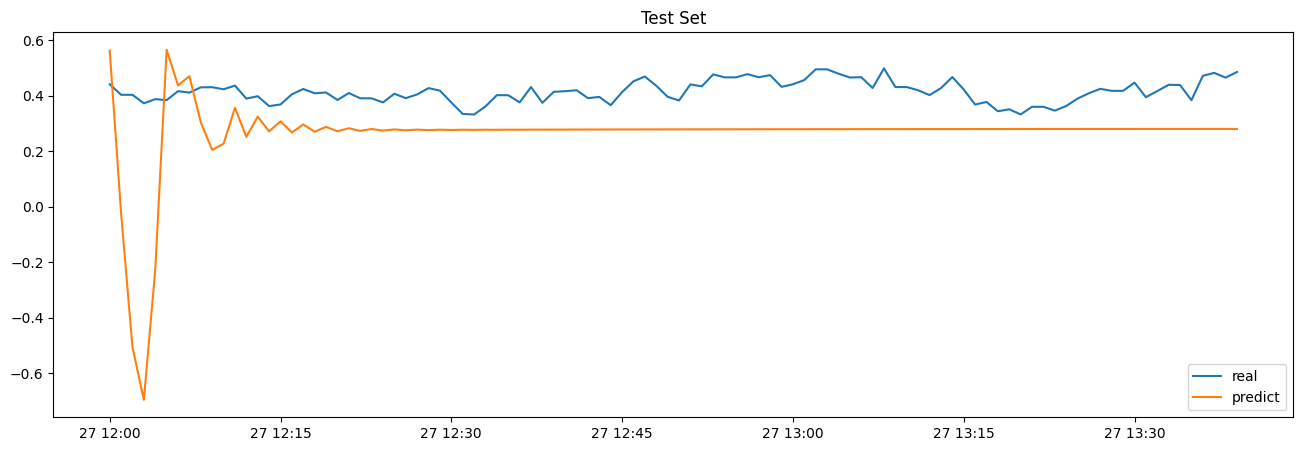

In [ ]:
print(mean_absolute_percentage_error(test_df[:100].values, predict))

plt.figure(figsize=(16,5))
plt.plot(test_df[:100], label="real")
plt.plot(test_df[:100].index, predict, label="predict")

plt.title("Test Set")
plt.legend()
plt.show()